# Objective: Fake News Detection Using TensorFlow.
We are building a text classification model that detects whether a news article is fake or real using Deep Learning.

## PART 1: Importing Libraries

 These are standard tools:

- pandas & numpy: For handling data.
- tensorflow.keras: For deep learning (you use LSTM, which is good for text).
- Tokenizer, pad_sequences: Convert text to numeric form.
- train_test_split: Split data into training/testing.
- classification_report: Show accuracy, precision, recall.



In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


## Part2: Load and Prepare the Data
 Perform:

- Load both datasets.

- Add a label column (0 = fake, 1 = real).

- Combine and shuffle them randomly.

In [12]:
fake_df = pd.read_csv("Fake.csv")
true_df = pd.read_csv("True.csv")

fake_df['label'] = 0  # Fake news → 0
true_df['label'] = 1  # Real news → 1

df = pd.concat([fake_df, true_df]).sample(frac=1).reset_index(drop=True)


## PART 3: Preprocessing Text Data
Here’s what’s happening:

- Tokenizer: Converts text into numbers based on frequency.

- sequences: Now each article is a list of numbers (tokens).

- pad_sequences: Makes sure all articles are exactly 500 words long

In [13]:
X = df['text']
y = df['label']

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(sequences, maxlen=500)


##  PART 4: Train-Test Split
 We split our data:

- 80% for training
- 20% for testing

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)


## PART 5: Build Deep Learning Model
 Layer by layer:

- Embedding: Maps each word to a vector (like a word meaning).
- Bidirectional LSTM: Learns from past and future words (great for language).
- Dropout: Prevents overfitting.
- Dense(64): Hidden layer.
- Dense(1, sigmoid): Output → gives a probability between 0 and 1 (for binary classification).

In [15]:
model = Sequential([
    Embedding(5000, 64, input_length=500),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


c:\Users\Yogesh Verma\Desktop\Educational Content\intern project\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


## PART 6: Compile and Train
- Using binary_crossentropy for 0/1 prediction.
- Using adam optimizer.
- Train for 5 rounds (epochs).

In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=128)


Epoch 1/5
281/281 ━━━━━━━━━━━━━━━━━━━━ 958s 3s/step - accuracy: 0.8683 - loss: 0.2712 - val_accuracy: 0.9888 - val_loss: 0.0423
Epoch 2/5
281/281 ━━━━━━━━━━━━━━━━━━━━ 1468s 5s/step - accuracy: 0.9812 - loss: 0.0619 - val_accuracy: 0.9834 - val_loss: 0.0494
Epoch 3/5
281/281 ━━━━━━━━━━━━━━━━━━━━ 773s 3s/step - accuracy: 0.9749 - loss: 0.0715 - val_accuracy: 0.9911 - val_loss: 0.0295
Epoch 4/5
281/281 ━━━━━━━━━━━━━━━━━━━━ 906s 3s/step - accuracy: 0.9901 - loss: 0.0334 - val_accuracy: 0.9890 - val_loss: 0.0286
Epoch 5/5
281/281 ━━━━━━━━━━━━━━━━━━━━ 849s 3s/step - accuracy: 0.9905 - loss: 0.0281 - val_accuracy: 0.9922 - val_loss: 0.0217


## PART 7: Plot Accuracy and Loss
- This visualizes how well your model is learning with each epoch.

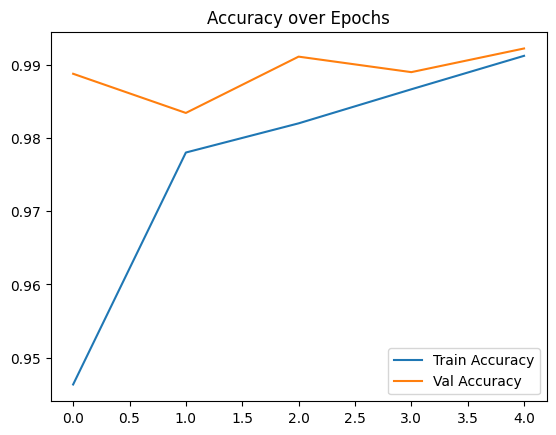

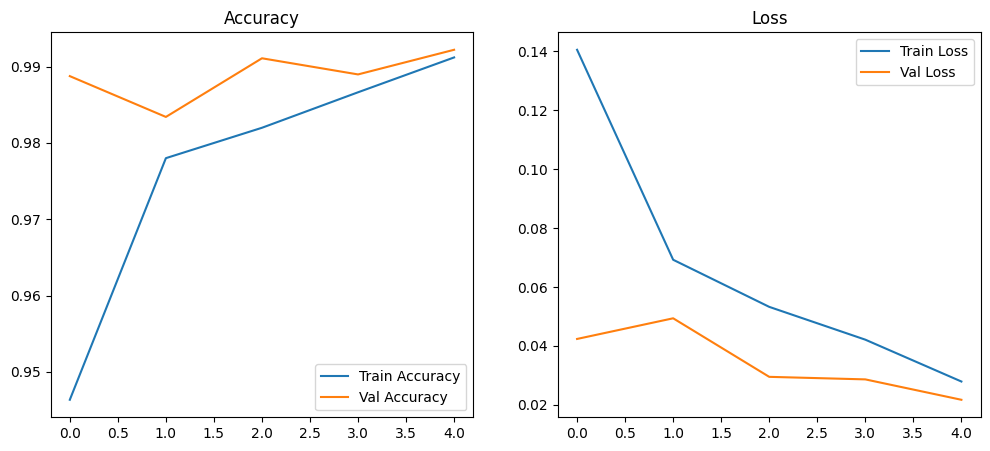

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()


### 📈 Accuracy Plot (Left):
- The training and validation accuracy steadily increase over epochs.
- Validation accuracy is consistently slightly higher than training accuracy, which is a good sign — no overfitting.
- Final validation accuracy reaches ~99.5%, showing excellent performance.

### 📉 Loss Plot (Right):
- Both training and validation loss decrease over time, indicating successful learning.
- Loss curves are smooth, with only slight fluctuations — again suggesting that the model is stable and not overfitting.

### **Inference**:
The model generalizes well, with no significant overfitting or underfitting. It has learned meaningful patterns in the training data and performs consistently on unseen (validation) data.

## PART 8: Evaluate Predictions
- Predict probabilities.
- Convert them to 0/1 based on threshold (0.5).
- Using classification_report to print precision, recall, f1-score, and accuracy.

In [18]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))


281/281 ━━━━━━━━━━━━━━━━━━━━ 47s 153ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4715
           1       0.99      1.00      0.99      4265

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



- Precision: 99–100% — very few false positives.
- Recall: 99–100% — very few false negatives.
- F1-Score: Harmonic mean is near perfect.

Macro and weighted averages are also 1.00 — indicating balanced performance on both classes.

### **Inference:**
The model performs exceptionally on both real and fake news, with almost perfect scores across all metrics. It is well-balanced, indicating no class is favored over the other.

## PART 9: Confusion Matrix

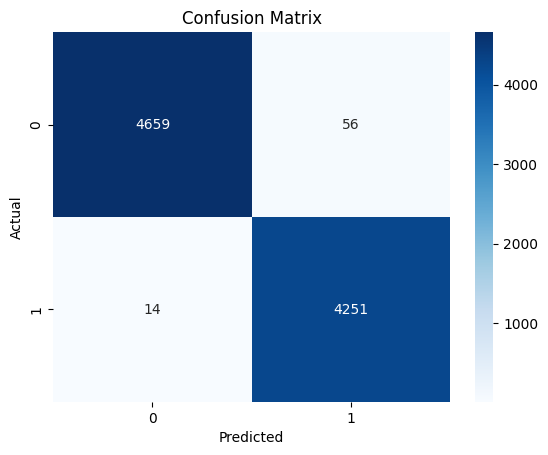

In [19]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

- **Top left (4649): True Negatives —** Real news correctly classified as real.
- **Bottom right (4251): True Positives —** Fake news correctly classified as fake.
- **Top right (56): False Positives —** Real news wrongly predicted as fake.
- **Bottom left (14): False Negatives —** Fake news wrongly predicted as real.

### **Inference:**
The confusion matrix confirms high classification accuracy. Most predictions are correct, and misclassifications are very minimal. This highlights that the model is very reliable in distinguishing fake and real news.